# 4)  FINDCONTOURS를 이용해서 이미지를 부분으로 나누기 

(879, 650, 3)
왼쪽 위 : 165 49
왼쪽 아래 : 165 765
오른쪽 위 : 373 49
오른쪽 아래 : 373 765


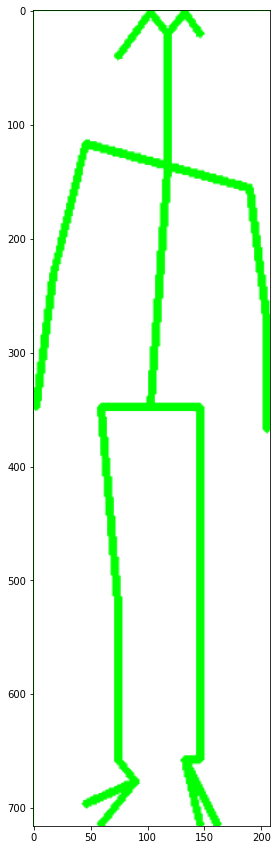

In [1]:
import cv2
import matplotlib.pyplot as plt
title1 = "No_data"  # 윈도우 이름
no_data = cv2.imread('C:\\Users\\flors\\1108 SKELETONED DATA\\test\\shoulder\\2.png')
if(no_data is None):  # 예외 처리 - 영상 파일 읽기
    raise Exception('영상 파일 읽기 에러')
print(no_data.shape)

# 배경 이미지가 백색이나 실제로는 흐린배경 존재, 배경을 백색으로 바꿔줌
no_data[no_data >=170] =255
img_gray = cv2.cvtColor(no_data, cv2.COLOR_BGR2GRAY)

# 이미지중 선이미지를 찾아 표시
# 컨투어란, 윤곽이라는 뜻 opencv에서 영상이나 이미지의 외곽 혹은 내곽 검출
# findContours 함수를 통해 이진화 이미지에서 윤곽선 찾아냄.
rect, img_th = cv2.threshold(img_gray, 150, 230, cv2.THRESH_BINARY_INV)
contours, hierachy =cv2.findContours(img_th.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
for rect in rects:
    rect
    cv2.rectangle(no_data, (rect[0], rect[1]),
                 (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0),1)
    # cv2.rectangle(사진, 왼쪽위 좌표, 오른쪽아래 좌표 , 선의 색, 선의 두께)

plt.figure(figsize=(15,15))
plt.imshow(no_data)

image = no_data.copy()
# [시작 height : 끝 height, 시작 width : 끝 width]
print('왼쪽 위 :', rect[0],rect[1])
print('왼쪽 아래 :', rect[0],rect[1]+rect[3])
print('오른쪽 위 :', rect[0] + rect[2],rect[1])
print('오른쪽 아래 :', rect[0] + rect[2], rect[1] + rect[3])

# 해당이미지 부분만 추출
# Slicing to crop the image
# cropped = img[start_row:end_row, start_col:end_col]
cropped_image = image[rect[1]:rect[1]+rect[3], rect[0]:rect[0] + rect[2]] # Slicing to crop the image
# Display the cropped image

cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cropped_image)

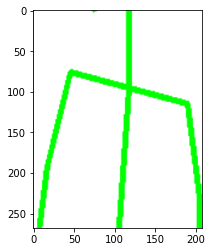

In [2]:
# 부위별 슬라이싱(어깨 틀어짐)
a = int(rect[1]+rect[2]*0.2)
b = int(rect[3]*0.5)
cropped_image = image[a:b, rect[0]:rect[0] + rect[2]] # Slicing to crop the image
plt.imshow(cropped_image)

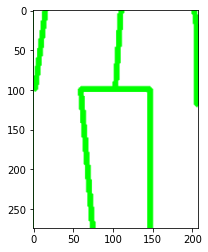

In [5]:
# 부위별 슬라이싱(골반 틀어짐)
a = int(rect[1]+rect[2]*1.2)
b = int(rect[3]*0.8)
cropped_image = image[a:b, rect[0]:rect[0] + rect[2]] # Slicing to crop the image
plt.imshow(cropped_image)

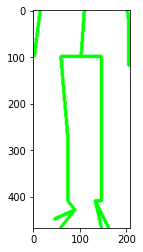

In [6]:
# 부위별 슬라이싱(오다리)
a = int(rect[1]+rect[2]*1.2)
cropped_image = image[a:rect[1]+rect[3], rect[0]:rect[0] + rect[2]] # Slicing to crop the image
plt.imshow(cropped_image)

#정확도를 높이기 위해서 이미지 파일 한장이 아니라 가지고 있는 전체 데이터셋을 160장을 각 부위별로 나누고, 

#이미지를 증폭시켜 특정 부분을 컴퓨터가 학습할 수 있도록 한 후 모델을 만들어야 되는데 시간관계상 만들기 어려웠음 